In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [6]:
!cp -r 'drive/MyDrive/Speech Emotion Recognition/' 'SER/'

In [6]:
cd SER/


/content/SER


In [50]:
!pip install lazypredict
!pip install librosa==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip archive_3.zip -d 'Ravedess'

In [37]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [39]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
#from pydub import AudioSegment

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        X=librosa.to_mono(X)
        sample_rate=sound_file.samplerate
        if chroma:
          try:
            stft=np.abs(librosa.stft(X))
          except:
            return None

        result=np.array([])
        if mfcc:
          try:
              mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
              result=np.hstack((result, mfccs))
          except:
            return None
        if chroma:
          try:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
          except:
            return None

        if mel:
          try:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
          except:
            return None
    return result

In [40]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [41]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/SER/Ravedess/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        if feature is not None:
          x.append(feature)
          y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

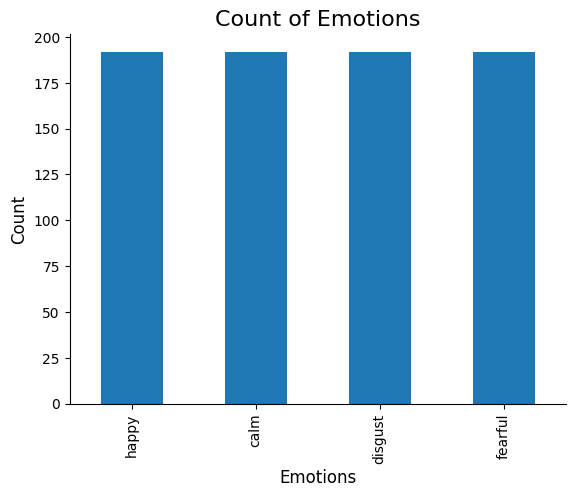

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

l = y_test.copy()
l.extend(y_train)
l = pd.Series(l)
l = l.value_counts()

plt.title('Count of Emotions', size=16)
l.plot(kind='bar')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



In [78]:
type(l)

pandas.core.series.Series

In [74]:
import pandas as pd
l = y_test.copy()
l.extend(y_train)
l = pd.Series(l)
l.value_counts()

happy      192
calm       192
disgust    192
fearful    192
dtype: int64

In [58]:
np.unique(y_train)

array(['calm', 'disgust', 'fearful', 'happy'], dtype='<U7')

In [42]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [43]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [44]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [45]:
x_train.shape

(576, 180)

In [55]:
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
### fitting data in LazyClassifier
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


In [56]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.71,0.72,None,0.71,0.49
LGBMClassifier,0.70,0.71,None,0.70,9.36
LogisticRegression,0.70,0.71,None,0.70,0.34
RidgeClassifierCV,0.68,0.69,None,0.68,0.20
LinearSVC,0.68,0.68,None,0.67,0.89
CalibratedClassifierCV,0.67,0.68,None,0.67,5.66
RandomForestClassifier,0.67,0.67,None,0.67,2.13
RidgeClassifier,0.66,0.67,None,0.66,0.05
NuSVC,0.66,0.66,None,0.65,0.29


In [46]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
#DataFlair - Train the model
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 71.35%


In [61]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


[[39  4  1  0]
 [ 5 32  6  6]
 [ 3  8 28  9]
 [ 0 11 11 29]]
              precision    recall  f1-score   support

        calm       0.83      0.89      0.86        44
     disgust       0.58      0.65      0.62        49
     fearful       0.61      0.58      0.60        48
       happy       0.66      0.57      0.61        51

    accuracy                           0.67       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.67      0.67      0.66       192



<Axes: >

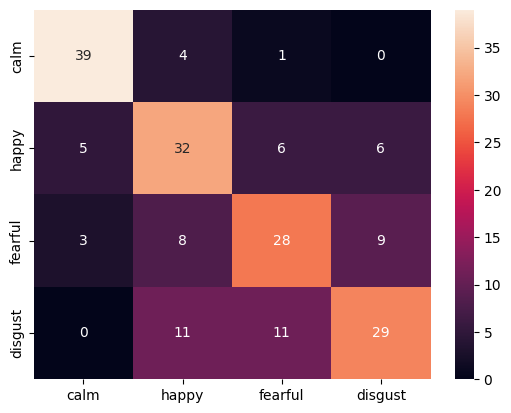

In [66]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=observed_emotions,yticklabels=observed_emotions)

In [59]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']